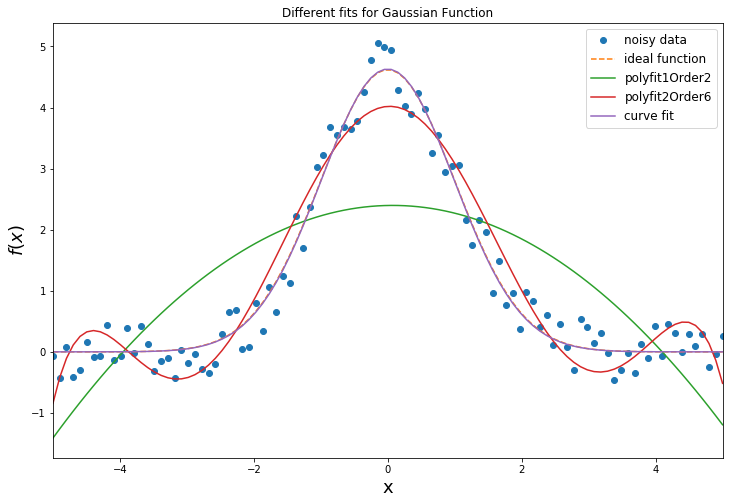

Original coefficients:  1.500,  2.000

Fitted coefficients for curve_fit:  1.495,  1.976

Fitted coefficents for fit1:[-0.14795826  0.02177282  2.39661802]
 Residuals: [126.53031888]

Fitted coefficients for fit2:[-1.83704073e-03  2.17087674e-04  8.11495038e-02 -6.61892684e-03
 -1.06851936e+00  6.25515105e-02  4.01903867e+00]
 Residual: [18.9793852]


In [10]:
%matplotlib inline  

#Import relevant libraries for calculations and fitting.
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[12, 8])

#Define the function: I use a gaussian function in my program.
f = lambda x, a, b: a  * np.exp(-(x**2-a**2)/b)  

#Define the parameters for the plot and fits.
x_min, x_max = -5,5
npoints = 100
order1 = 2
order2 = 6
a = 1.5
b = 2

#Populate np arrays, "y" array gives random data.
x = np.linspace(x_min, x_max, npoints)
y = f(x, a, b) + np.random.rand(npoints)- 0.5

#Polyfit for order1 parameter.
fit1 = np.polyfit(x, y, order1, full=True)
y_p1 = np.polyval(fit1[0], x)

#Polyfit for order2 parameter.
fit2 = np.polyfit(x, y, order2, full=True)
y_p2 = np.polyval(fit2[0], x)

#Parameter best fits for Gaussian function using curve_fit
params, extras = curve_fit(f, x, y)

#Plot the noisy data, ideal function, two polynomial fits and one curve fit.
plt.plot(x, y, 'o', label = 'noisy data')
plt.plot(x, f(x, a, b), '--', label='ideal function')
plt.plot(x, y_p1, label='polyfit1Order'+str(order1))
plt.plot(x, y_p2, label='polyfit2Order'+str(order2))
plt.plot(x, f(x, params[0], params[1]), label='curve fit')

plt.xlabel('x', fontsize=18)
plt.ylabel('$f(x)$', fontsize=18)
plt.xlim([x_min,x_max])
plt.legend(fontsize=12)
plt.title('Different fits for Gaussian Function')
plt.show()

#Print the original coefficients, the curve_fit coefficients, as well as
#the coefficients and residuals for each polynomial fit, fit1 and fit2.
print('Original coefficients: %6.3f, %6.3f' %(a,b))
print()
print('Fitted coefficients for curve_fit: %6.3f, %6.3f' %(params[0], params[1]))
print()
print('Fitted coefficents for fit1:' + str(fit1[0]) + '\n Residuals: ' + str(fit1[1]))
print()
print('Fitted coefficients for fit2:' + str(fit2[0]) + '\n Residual: ' + str(fit2[1]))

From the above curves, it is clear that the scipy.optimize.curve_fit function generates the closest fit to the Gaussian function. The fitted coefficients from the curve_fit were closest to their true values.

The polynomial fit of low order (<3) does not fit the Gaussian data very well at all, shown by the very large residuals.
Increasing the order of the polynomial fit generates better residuals - however, visually, the polynomial fit does not
match the behavior of the Gaussian function.

Thus, higher order polynomial fits tend to overfit the data and are not physically representative of the Gaussian function.